<a href="https://www.kaggle.com/code/bhavinmoriya/stock-index-analysis?scriptVersionId=110654168" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt, timedelta as td
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
sns.set()
import pandas_datareader as web

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
indices = '^GSPC ^IXIC ^GDAXI tsla'.split()
start = dt.today() - td(days=4000)
df = web.get_data_yahoo(indices, start = start)
df

Attributes    Adj Close                                                Close  \
Symbols           ^GSPC         ^IXIC        ^GDAXI        tsla        ^GSPC   
Date                                                                           
2011-11-29  1195.189941   2515.510010   5799.910156    2.116667  1195.189941   
2011-11-30  1246.959961   2620.340088   6088.839844    2.182667  1246.959961   
2011-12-01  1244.579956   2626.199951   6035.879883    2.173333  1244.579956   
2011-12-02  1244.280029   2626.929932   6080.680176    2.220000  1244.280029   
2011-12-05  1257.079956   2655.760010   6106.089844    2.294667  1257.079956   
...                 ...           ...           ...         ...          ...   
2022-11-04  3770.550049  10475.250000  13459.849609  207.470001  3770.550049   
2022-11-07  3806.800049  10564.519531  13533.519531  197.080002  3806.800049   
2022-11-08  3828.110107  10616.200195  13688.750000  191.300003  3828.110107   
2022-11-09  3748.570068  10353.169922  13666.320312  177.589996  3748.570068   
2022-11-10  3956.370117  11114.146484  14146.089844  190.720001  3956.370117   

Attributes                                                 High                \
Symbols            ^IXIC        ^GDAXI        tsla        ^GSPC         ^IXIC   
Date                                                                            
2011-11-29   2515.510010   5799.910156    2.116667  1203.670044   2542.459961   
2011-11-30   2620.340088   6088.839844    2.182667  1247.109985   2620.340088   
2011-12-01   2626.199951   6035.879883    2.173333  1251.089966   2636.080078   
2011-12-02   2626.929932   6080.680176    2.220000  1260.079956   2659.229980   
2011-12-05   2655.760010   6106.089844    2.294667  1266.729980   2674.530029   
...                  ...           ...         ...          ...           ...   
2022-11-04  10475.250000  13459.849609  207.470001  3796.340088  10553.629883   
2022-11-07  10564.519531  13533.519531  197.080002  3813.949951  10587.959961   
2022-11-08  10616.200195  13688.750000  191.300003  3859.399902  10745.639648   
2022-11-09  10353.169922  13666.320312  177.589996  3818.199951  10564.969727   
2022-11-10  11114.146484  14146.089844  190.720001  3958.330078  11119.115234   

Attributes  ...           Low                     Open                \
Symbols     ...        ^GDAXI        tsla        ^GSPC         ^IXIC   
Date        ...                                                        
2011-11-29  ...   5690.569824    2.108667  1192.560059   2529.110107   
2011-11-30  ...   5725.979980    2.148000  1196.719971   2586.389893   
2011-12-01  ...   6017.379883    2.132000  1246.910034   2615.669922   
2011-12-02  ...   6055.479980    2.160000  1246.030029   2650.800049   
2011-12-05  ...   6086.419922    2.228667  1244.329956   2666.469971   
...         ...           ...         ...          ...           ...   
2022-11-04  ...  13193.509766  203.080002  3766.979980  10548.139648   
2022-11-07  ...  13391.000000  196.660004  3780.709961  10516.940430   
2022-11-08  ...  13487.910156  186.750000  3817.020020  10611.530273   
2022-11-09  ...  13557.080078  177.119995  3810.939941  10528.450195   
2022-11-10  ...  13599.349609  180.029999  3859.889893  10869.200195   

Attributes                                  Volume                             \
Symbols           ^GDAXI        tsla         ^GSPC         ^IXIC       ^GDAXI   
Date                                                                            
2011-11-29   5725.680176    2.166000  3.992650e+09  1.623550e+09  143661800.0   
2011-11-30   5741.209961    2.166667  5.801910e+09  2.440960e+09  244420000.0   
2011-12-01   6080.479980    2.171333  3.818680e+09  1.826860e+09  153040000.0   
2011-12-02   6117.729980    2.188667  4.144310e+09  1.662730e+09  205318700.0   
2011-12-05   6137.870117    2.235333  4.148060e+09  1.686660e+09  201034200.0   
...                  ...         ...           ...           ...          ...   
2022-1

In [3]:
new_col = []
for c in df.columns:
    new_col.append('_'.join(c))

In [4]:
df.columns = new_col

In [5]:
df = df.iloc[:,:len(indices)]
df

,Adj Close_^GSPC,Adj Close_^IXIC,Adj Close_^GDAXI,Adj Close_tsla
Date,,,,
2011-11-29,1195.189941,2515.510010,5799.910156,2.116667
2011-11-30,1246.959961,2620.340088,6088.839844,2.182667
2011-12-01,1244.579956,2626.199951,6035.879883,2.173333
2011-12-02,1244.280029,2626.929932,6080.680176,2.220000
2011-12-05,1257.079956,2655.760010,6106.089844,2.294667
...,...,...,...,...
2022-11-04,3770.550049,10475.250000,13459.849609,207.470001
2022-11-07,3806.800049,10564.519531,13533.519531,197.080002
2022-11-08,3828.110107,10616.200195,13688.750000,191.300003


As ranges of each index is at very different scale to get better idea we will normalize it.

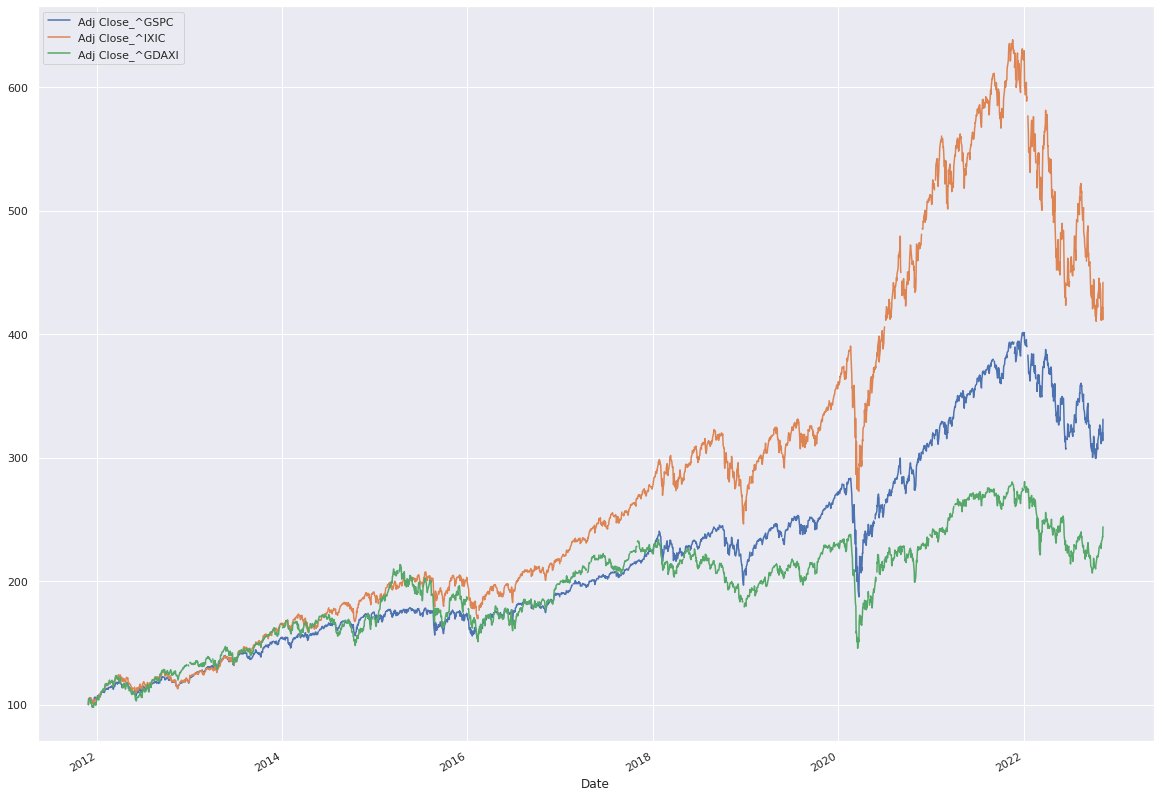

In [6]:
(df * 100 / df.iloc[0]).iloc[:,:-1].plot(figsize=(20,15));

Indices are used to compare the performace of a single stock. We shall compare the tesla stock.

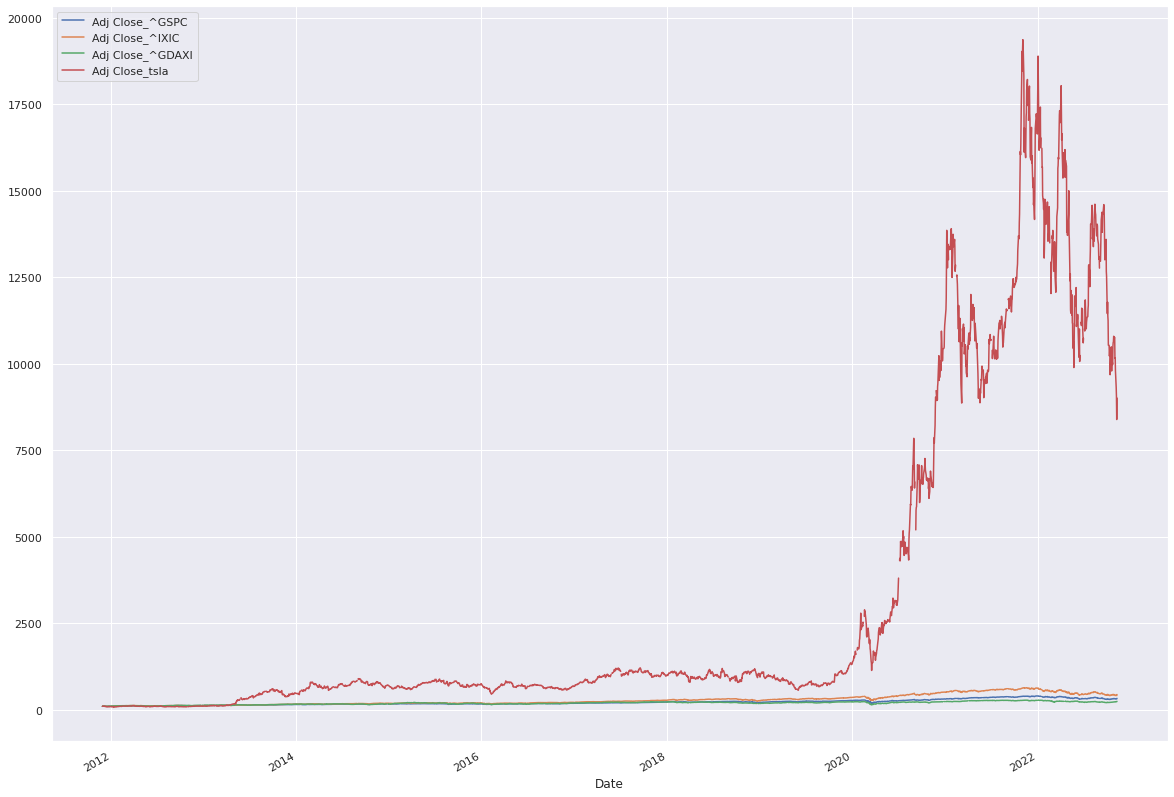

In [7]:
(df * 100 / df.iloc[0]).plot(figsize=(20,15));

TSLA is way beyond all indices. SO if you had put money in TSLA you would have made huge money :)

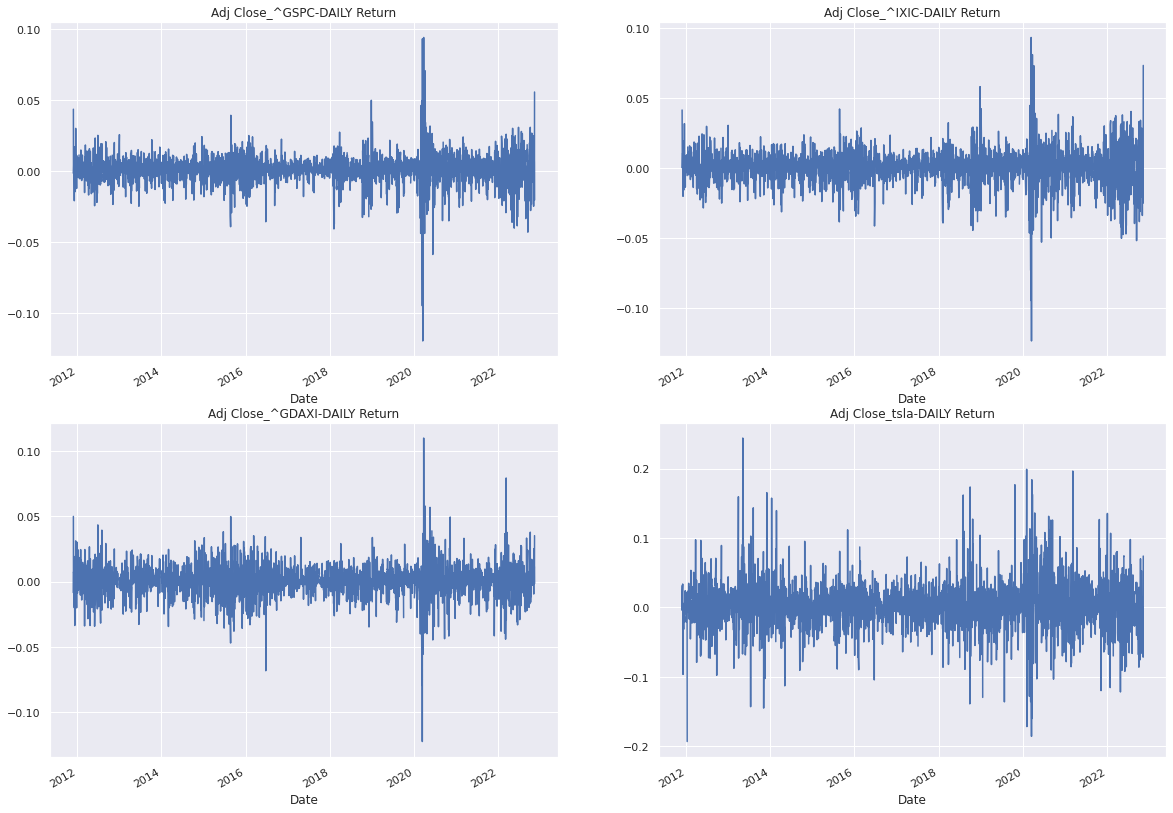

In [8]:
# Dailyy return 

daily_return = (df / df.shift())-1
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
for i, c in enumerate(df.columns):
    daily_return.loc[:,c].plot(figsize= (20,15), ax=ax[i])
    ax[i].set_title(f'{c}-DAILY Return')

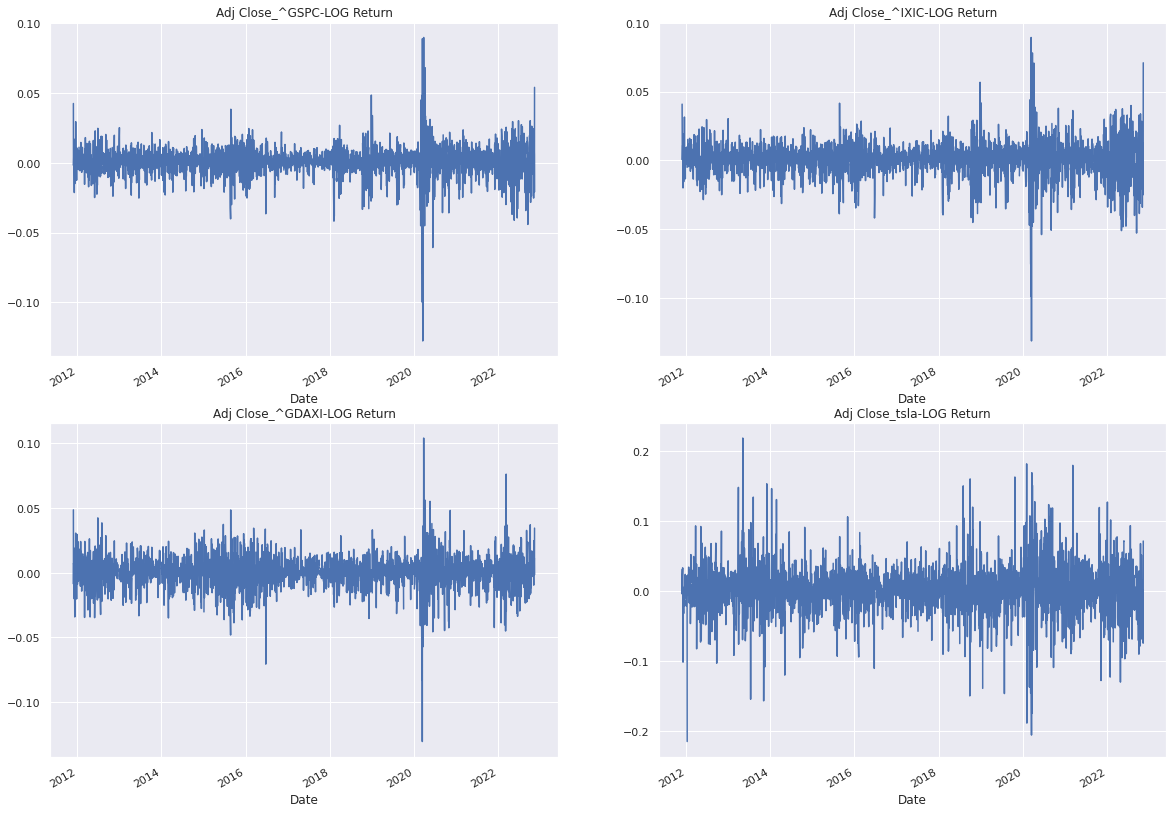

In [9]:
log_return = np.log(df / df.shift())
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
for i, c in enumerate(df.columns):
    log_return.loc[:,c].plot(figsize= (20,15), ax=ax[i], )
    ax[i].set_title(f'{c}-LOG Return')

<AxesSubplot:>

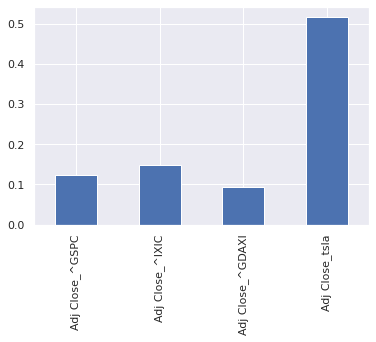

In [10]:
annual_ret = daily_return.mean() * 250
annual_ret.plot.bar()

In [11]:
# COmpare beiersdorf share with tesla

df = web.get_data_yahoo('tsla bei.de'.split(), start=start)
df = df.loc[:,'Adj Close']
df
# new_col = []
# for c in df.columns:
#     new_col.append('_'.join(c))
# df
    

Symbols,tsla,bei.de
Date,,
2011-11-29,2.116667,37.329662
2011-11-30,2.182667,38.605156
2011-12-01,2.173333,39.267864
2011-12-02,2.220000,38.845722
2011-12-05,2.294667,39.190693
...,...,...
2022-11-04,207.470001,96.480003
2022-11-07,197.080002,96.080002
2022-11-08,191.300003,97.260002


<AxesSubplot:xlabel='Symbols'>

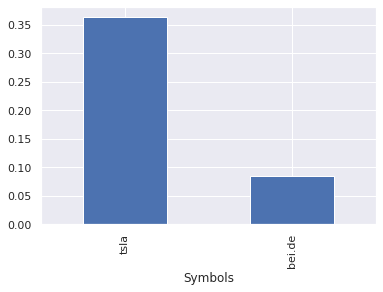

In [12]:
log_ret = np.log(df / df.shift())
(log_ret.mean() * 250).plot.bar()

Tesla is way better. We expect volatility (Risk) will be higher too.

<AxesSubplot:xlabel='Symbols'>

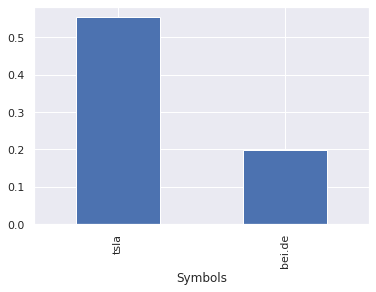

In [13]:
(log_ret.std() * 250 ** .5).plot.bar()

Tesla is way more volatile